# ASP project lambda SABR 

## Time-discretization
 In this section, we use time discretization method to perform Monte Carlo simulations on the $\lambda -SABR$ model. For the choice of methods, we use the Euler scheme and the Milstein scheme respectively. Regarding the drift term in the expansion, we substitute it with two types of means to compare the overall effects. This is then compared with the results from Conditional MC. After obtaining the trajectories of the underlying assets, we calculate the implied volatility using various methods.

* For $\lambda-SABR$ model, we have volatility $\sigma_{t}$ obeying such process:
$$d \sigma_{t}=\lambda\left(\theta-\sigma_{t}\right) d t+\nu \sigma_{t} d Z_{t}$$
* We derived the Oular / Milstein scheme for $\sigma_{t}$ as:

\begin{equation}
\sigma_{t+\Delta t}=\sigma_{t}+\lambda\left(\theta-\sigma_{t}\right) \Delta t+\nu \sigma_{t} Z \sqrt{\Delta t}+\frac{\nu^{2}}{2} v_{t}\left(Z^{2}-1\right) \Delta t 
\tag{1}
\end{equation}

* We apply two approaches to cauculate $\sigma_{t+\Delta t}$:
* First, We define $y_{t}:=\left(\sigma_{t} - \theta \right )e^{\lambda t}$ and easily get $y_{t}$ is a martingale and we have:$E\left (\sigma_{t+\Delta t} \mid  \sigma_{t} \right)=\theta + \left(\sigma_{t} - \theta \right )e^{-\lambda \Delta t}$ 
So we have:

\begin{equation}
\sigma_{t+\Delta t}=\theta + \left(\sigma_{t} - \theta \right )e^{-\lambda \Delta t}+\nu \sigma_{t} Z \sqrt{\Delta t}+\frac{\nu^{2}}{2} v_{t}\left(Z^{2}-1\right) \Delta t
\tag{2}
\end{equation}

* Second, we use the exact mean and variance to adjust the dirft and random terms, for the following SDE: $$d X_{t}=\lambda\left(\mu-X_{t}\right) d t+\sigma X_{t} d W_{t} .$$we have:

\begin{array}{l}
E\left(X_{t}\right)=\mu\left(1-e^{-\lambda t}\right)+x_{0} e^{-\lambda t} . \\
E\left(X_{t}^{2}\right)=\left\{\begin{array}{ll}
2 \mu^{2} e^{-\lambda t}+2 \mu^{2}(\lambda t-1)+2 \mu x_{0}\left(1-e^{-\lambda t}\right)+x_{0}^{2}, & \text { if } \frac{2 \lambda}{\sigma^{2}}=1 ; \\
2 \mu^{2}-2(\lambda t+1) \mu^{2} e^{-\lambda t}+2 \lambda \mu x_{0} t e^{-\lambda t}+x_{0}^{2} e^{-\lambda t}, & \text { if } \frac{\lambda}{\sigma^{2}}=1 ; \\
\frac{2 \lambda \mu^{2}}{2 \lambda-\sigma^{2}}-\frac{2 \lambda \mu^{2}}{\lambda-\sigma^{2}} e^{-\lambda t}+\frac{2 \lambda^{2} \mu^{2}}{\left(\lambda-\sigma^{2}\right)\left(2 \lambda-\sigma^{2}\right)} e^{-\left(2 \lambda-\sigma^{2}\right) t} & \\
+\frac{2 \lambda \mu x_{0}}{\lambda-\sigma^{2}} e^{-\lambda t}-\frac{2 \lambda \mu x_{0}}{\lambda-\sigma^{2}} e^{-\left(2 \lambda-\sigma^{2}\right) t}+x_{0}^{2} e^{-\left(2 \lambda-\sigma^{2}\right) t} & \text { otherwise. }
\end{array}\right. \\
\end{array}

- For the original Melstein expansion, mean is given by: $\sigma_{t}+\lambda\left(\theta-\sigma_{t}\right) \Delta t$.

- *As for the variance, we have $Var(Z)=1$ and $Var(Z^{2}-1)=2$, we have:$Var\left ( \sigma_{t+\Delta t}\mid \sigma_{t} \right )= \nu^2\sigma^{2}_{t}\Delta t+\frac{1}{2}\nu^{4}\sigma^{2}_{t}\Delta^{2}t$. We just take variance as: $Var\left ( \sigma_{t+\Delta t}\mid \sigma_{t} \right )= \nu^2\sigma^{2}_{t}\Delta t$

- So, we replace the drift tern using the variance, $Var(X)=E(X^{2}) - [E(X)]^{2}$, we have:

\begin{array}{l}
Var\left ( \sigma_{t+\Delta t}\mid \sigma_{t} \right ) =& \frac{2 \lambda \theta^{2}}{2 \lambda-\nu^{2}}-\frac{2 \lambda \theta^{2}}{\lambda-\nu^{2}} e^{-\lambda \Delta t}+\frac{2 \lambda^{2} \theta^{2}}{\left(\lambda-\nu^{2}\right)\left(2 \lambda-\nu^{2}\right)} e^{-\left(2 \lambda-\nu^{2}\right) \Delta t}\\ 
&+\frac{2 \lambda \theta \sigma_{t}}{\lambda-\nu^{2}} e^{-\lambda \Delta t}-\frac{2 \lambda \mu \sigma_t}{\lambda-\nu^{2}} e^{-\left(2 \lambda-\nu^{2}\right) \Delta t}+\sigma_{t}^{2} e^{-\left(2 \lambda-\nu^{2}\right) \Delta t}\\
&-\left [ \theta^{2} +\theta^{2}e^{-2\lambda \Delta t}-2\theta e^{-\lambda \Delta t}+\sigma^{2}_{t}e^{-2\lambda \Delta t}+2\theta \sigma_t e^{-\lambda \Delta t}-2\sigma_t e^{-\lambda \Delta t}\right] \\
\end{array}

As a result, we have:
\begin{equation}
\sigma_{t+\Delta t}= E\left(\sigma_{t+\Delta t}\mid \sigma_{t} \right) + Var\left ( \sigma_{t+\Delta t}\mid \sigma_{t} \right ) Z+\frac{\nu^{2}}{2} v_{t}\left(Z^{2}-1\right) \Delta t
\tag{3}
\end{equation}


After we get the path of $\sigma_{t}$, we can derive the path of $S_{t}$ respectively.
\begin{equation}
S_{t}:\left\{\begin{array}{l}
S_{t+\Delta t}=S_{t}+\sigma_{t} W_{1} \sqrt{\Delta t}, \beta=0 \\
\log S_{t+\Delta t}=\log S_{t}+\sigma_{t} W_{1} \sqrt{\Delta t}-\frac{1}{2} \sigma_{t}^{2} \Delta t, \beta=1 \\
\frac{S_{t+\Delta t}^{-\beta+1}}{-\beta+1}=\frac{S_{t}^{-\beta+1}}{-\beta+1}+\sigma_{t} W_{1} \sqrt{\Delta t}-\frac{1}{2} \sigma_{t}^{2} S_{t}^{\beta-1} \Delta t, \beta \neq 0,1
\end{array}\right.
\tag{4}
\end{equation}

In [1]:
import pyfeng
from pyfeng import sv_abc as sv
from pyfeng import bsm

In [2]:
class LamSABRMcTimeDisc(sv.SvABC, sv.CondMcBsmABC):
	"""
	Garch model with conditional Monte-Carlo simulation
	The SDE of SV is: d sigma_t = mr * (theta - sigma_t) dt + vov * sigma_t dB_T
	"""

	model_type = "LamSABR"
	vol_process = True
	scheme = 1  #

	def set_num_params(self, n_path=10000, dt=0.05, rn_seed=None, antithetic=True, scheme=1):
		"""
		Set MC parameters

		Args:
			n_path: number of paths
			dt: time step
			rn_seed: random number seed
			antithetic: antithetic
			scheme: 0 for Euler, 1 for Milstein (default)

		References:
			- Andersen L (2008) Simple and efficient simulation of the Heston stochastic volatility model. Journal of Computational Finance 11:1–42. https://doi.org/10.21314/JCF.2008.189
		"""
		super().set_num_params(n_path, dt, rn_seed, antithetic)
		self.scheme = scheme

	def vol_step_euler(self, dt, vol_0, mean_replace='original', milstein=True):
		"""
		Euler/Milstein Schemes:
		sigma_(t+dt) = sigma_t + mr * (theta - sigma_t) * dt + vov * sigma_t Z * sqrt(dt) + (vov^2/2) sigma_t (Z^2-1) dt

		Args:
			vol_0: initial variance
			dt: delta t, time step
			mean_replace: if 'original': sigma_(t+dt) = sigma_t + mr * (theta - sigma_t) * dt + vov * sigma_t Z * sqrt(dt) + (vov^2/2) sigma_t (Z^2-1) dt
			              if 'exp': theta + (sigma_t - theta) * exp(-mr * dt) + vov * sigma_t Z * sqrt(dt) + (vov^2/2) sigma_t (Z^2-1) dt
			              if 'exact' :  theta * (1-exp(-mr * dt)) + sigma_t * exp(-mr * dt) + vov * sigma_t Z * sqrt(dt) + (vov^2/2) sigma_t (Z^2-1) dt

		Returns: Variance path (time, path) including the value at t=0
		"""

		zz = self.rv_normal(spawn=0)
		if mean_replace == 'original':
			vol_t = vol_0 + self.mr * (self.theta - vol_0) * dt + self.vov * vol_0 * np.sqrt(dt) * zz
		elif mean_replace == 'exp':
			vol_t = self.theta + (vol_0 - self.theta) * np.exp(-self.mr * dt) + self.vov * vol_0 * np.sqrt(dt) * zz
		elif mean_replace == 'exact':
			vol_t = self.theta * (1 - np.exp(-self.mr * dt)) + vol_0 * np.exp(
				-self.mr * dt) + self.vov * vol_0 * np.sqrt(dt) * zz #todo
		else:
			raise Exception('mean_replace input wrong')

		if milstein:
			vol_t += (self.vov ** 2 / 2) * vol_0 * dt * (zz ** 2 - 1)

		# although rare, floor at zero
		vol_t[vol_t < 0] = 0.0

		return vol_t
	

	def cond_states_step(self, dt, vol_0):

		if self.scheme in [0,1]:
			milstein = (self.scheme == 1)
			vol_t = self.vol_step_euler(dt, vol_0, milstein=milstein)
		else:
			raise ValueError(f'Invalid scheme: {self.scheme}')

		return vol_t

	def cond_spot_sigma(self, texp, vol_0):
		tobs = self.tobs(texp)
		dt = np.diff(tobs, prepend=0)
		n_dt = len(dt)

		vol_t = np.full(self.n_path, vol_0)

		for i in range(n_dt):
			vol_t = self.cond_states_step(dt[i], vol_t)
			

		avgvol /= texp
		avgivol /= texp
		# todo
		spot_cond = (vol_t - vol_0 - self.mr * self.theta ) / self.vov + \
					(-self.mr * self.theta * avgivol / self.vov \
					 + (self.mr / self.vov + self.vov / 4) * avgvol - self.rho * avgvar / 2) * texp
		np.exp(self.rho * spot_cond, out=spot_cond)

		cond_sigma = np.sqrt((1.0 - self.rho ** 2) / var_0 * avgvar)

		return spot_cond, cond_sigma

	def return_var_realized(self, texp, cond):
		return None

 
## Asympototic Volatility for Stochastic Volatility Models  
### introduction to Stochastic Volatility Models

Any Stochastic Volatility Models can be expresss by for asset f and volatility a. Denote $x=(x_{i})_{i=1,2}=(f,a)$,
initial conditions $\alpha = (\alpha_i)_{i=1,2}=(f_{0},\alpha)$
$$\begin{array}{l}
d x^{i}=b_{i}(x, t) d t+\sigma_{i}(x, t) d W_{i} \\
d W_{i} d W_{j}=\rho_{i j}(x, t) dt
\end{array}$$

### Expression on Riemannian manifold 
Riemannian manifold (M, g) is a real, smooth manifold M equipped with a positive-definite inner product g on the tangent space TpM at each point p.
#### local volatility
we have local volatility satisfied
$$
\sigma^{2}(f,\tau)={\frac{2\int_{0}^{\infty}\sqrt{g}g^{ff}pda}{\int_{0}^{\infty}p\sqrt{g}da}}
$$
$g_{ij}$ is metric on Riemannian manifold M
$$
\mathcal{A}^{i}=\quad\frac{1}{2}(b^{i}-g^{-\frac{1}{2}}\partial_{j}(g^{1/2}g^{ij}))\\Q=\quad g^{ij}(\mathcal{A}_{i}\mathcal{A}_{j}-b_{j}\mathcal{A}_{i}-\partial_{j}\mathcal{A}_{i})
$$
$\mathcal{A}_{i}$ are connection on Riemannian manifold M like taking derivative.
###  Laplacian heat kernel of probability
Heat kernel D defined on Riemannian manifold is 
$$
\begin{array}{rcl}D&=&g^{ij}\nabla_i\nabla_j+Q\\&=&g^{-\frac{1}{2}}(\partial_i+\mathcal{A}_i)g^{\frac{1}{2}}g^{ij}(\partial_j+\mathcal{A}_j)+Q\end{array}
$$

p is the condtional probability and The following theorem proved by Minakshisundaram-Pleijel-De Witt-Gilkey gives the complete asymptotic solution for the heat kernel on a Riemannian manifold


$$p(x,y, \tau )= \frac {\sqrt {g(x)}}{(4\pi \tau )}^ {\frac {n}{2}}\sqrt {\Delta (x,y)}P(x,y)e^ {-\frac {\alpha (x,y)}{2\tau}} \sum _ {n=0}^ {\infty } a_ {n} (x,y) \tau ^ {n}$$

*Here, σ(x,y)  equal to one half of the square of
 geodesic distance $|x−y|_{g}$ between x and y for the metric g. This distance
 is defined as the minimiser of

$$ \min _ {C}  \int _ {0}^ {T} g_ {ij} \frac {dx^ {i}}{dt}\frac {dx^ {j}}{dt}  dt
$$

 $$ \frac {d^ {2}x^ {i}}{d^ {2}t} + \Gamma_ {jk}^ {i}  \frac {dx^ {j}}{dt} \frac {dx^ {k}}{dt} =0$$
 
 where

 $$
 \Gamma_ {ij}^ {k}  =  \frac {1}{2}  g^ {kp}(  \partial_ {j}  g_ {ip} + \partial _ {i} g_ {jp} - \partial _ {p}  g_ {ji})

 $$

 $\Delta(x,y)$ is the so-called Van Vleck-Morette determinant

 $ g(x) = detg_{ij}(x,x)$

 P(x,y) is the parallel transport of the Abelian connection along the geodesic from the point y to x
 
 $$
 P(x,y)=e^{\int_{C(x,y)}A_{i}dx^{i}}
 $$

 The $a_i(x,y) (a_{}(x,y) = 1)$ are smooth functions on M and depend on
 geometric invariants such as the scalar curvature R. The first coefficients
 are fairly easy to compute by hand.

 $$
 a_{1}(x,x)=\frac{1}{6}R+Q
 $$

by using the first 2

$$p= \frac {1}{4\pi\tau}\sqrt{\Delta (x,y)}P(x,y)e^ {-\frac {d^{2}(x,y)}{4\tau}}(1+(Q+\frac{R}{6}))$$

 $$
\mathcal{A}^{i}=\quad\frac{1}{2}(b^{i}-g^{-\frac{1}{2}}\partial_{j}(g^{1/2}g^{ij}))\\Q=\quad g^{ij}(\mathcal{A}_{i}\mathcal{A}_{j}-b_{j}\mathcal{A}_{i}-\partial_{j}\mathcal{A}_{i})
$$



 (uniformisation)Every metric on a simply connected Riemann surface1 is conformally equivalent ( under conformal map f)to a metric of constant scalar curvature
 R:
 1. R=+1: the Riemann sphere $\mathbb{S}^{2}$
 2. R=0: the complex plane $\mathbb{C}$
 3. R=−1: the upper half plane H2 = {z $\in \mathbb{C}$|Im(z) > 0}


## Unified Asymptotic Implied Volatility
The general asymptotic implied volatility at the first-order (for any (time independent) stochastic volatility models) , depending implicitly on the metric g and the connection A on our Riemann surface, is given by
$$
\sigma_{BS}(K,\tau,g_{ij},\mathcal{A}_{i})=\frac{ln(\frac{K}{f_{0}})}{\int_{f_{0}}^{K}\frac{df^{\prime}}{\sqrt{2g^{ff}(c)}}}(1+\frac{g^{ff}\tau}{12}(-\frac{3}{4}(\frac{\partial_{f}g^{ff}(c)}{g^{ff}(c)})^{2}+\frac{\partial_{f}^{2}g^{ff}(c)}{g^{ff}(c)}(\frac{1}{f^{2}})\\+\frac{6}{g^{ff}(c)\phi^{\prime\prime}(c)}(g^{ff^{\prime}}(c)((ln(\Delta g\mathcal{P}^{2})^{\prime}(c)-\frac{\phi^{\prime\prime\prime}(c)}{\phi^{\prime\prime}(c)})+g^{ff^{\prime\prime}}(c)))))(4.4)
$$



 

### Applied on $\lambda$-SABR model
Define $\lambda$-SABR model has following SDE:

$$
df=\sigma C(f)  dW_ {1} $$

$$dv=\lambda (\sigma-\bar{\lambda} )dt+ \nu \sigma dW_ {2} $$

$$C(f)= f^ {\beta } ,\sigma(0)= \alpha ,f(0)= f_ {0}$$

$$

Asymptotic smile for the λ-SABR
 The asymptotic smile (with strike f , maturity date $\tau$ and spot $f_0$) at the first
order associated to the stochastic λ-SABR model is

$$\sigma_{B S}\left(f_{0}, f, \tau\right)=\frac{\ln \left(\frac{f_{0}}{f}\right)}{\operatorname{vol}(q)}\left(1+\sigma_{1}\left(\frac{f+f_{0}}{2}\right) \tau\right)$$

 $$ \sigma _ {1} (f)= \frac {(a_ {\min }C(f))^ {2}}{24}  ( \frac {1}{f^ {2}}  +  \frac {\partial_ {ff}(C(f)a_ {\min })}{C(f)a_ {\min }}  -(  \frac  {\partial _ {f}(C(f)a_ {\min })}{C(f)a_ {\min }})^ {2} )$$ 
 $$+\frac{\alpha  \nu ^ {2} T  \ln  (P)'(  a_ {\min }  )(1-  \rho ^ {2}  ) \sqrt {\cosh (d(a_ {\min} ))^{2}-1}} 
{2d(a_{\min})}$$
withq= $ \frac {f^{(1-\beta )}-f_{0}^{(1-\beta)}}{(1-\beta )} 
(  \beta   \neq  1)$,$vol(q)=  \frac {1}{\nu } \log  (  \frac {-q\nu -\alpha\rho+\sqrt {\alpha ^ {2}+q^ {2}\nu ^ {2}+2q\alpha \nu \rho }}{\alpha (1-\rho )} )$ 

and

 $ a_ {\min }(q)= \sqrt {\alpha ^ {2}+2\alpha \nu \rho q +\nu ^ {2} q^ {2}} $ .
$d(a_{\min}=\cosh^{-1}(\frac{-q\nu\rho-\alpha\rho^{2}+a_{\min}}{\alpha(1-rho^{2})}))$
Moreover we have

 $$ \ln( \frac {P}{P^{SABR}} )'(  a_ {\min } )=  \frac {\lambda }{\nu ^ {2}} (  G_ {0} ( \theta _ {2} (  a_ {\min } ),  A_ {0}  (  a_ {\min }  ),B) \theta _ {2}  '(a_ {\min } )- G_ {0} ( \theta _ {1}  ( a_ {\min }  ), A_ {0}  ( a_ {\min } ),B) \theta _ {1}'$$

 $$ + A_ {0}  '(  a_ {\min }  )(  G_ {1}  ( \theta _ {2}  (  a_ {\min }  ),B)-  G_ {1}  (  \theta _ {1}  (  a_ {\min }  ),B))$$

with
 $$ \ln  (P^{SABR})'(  a_ {\min }  )=  \frac {\beta }{2(1-\rho ^ {2})(1-\beta )} (  F_ {0}  ( \theta _ {2}  (  a_ {\min }  ),A(  a_ {\min }  ),B) \theta _ {2}  '(  a_ {\min }  )$$

$$ -F_ {0}  ( \theta _ {1}  (  a_ {\min }  ),A(  a_ {\min }  ),B)  \theta _ {1}  '(  a_ {\min }  )-A'(a)(  F_ {1}  (  \theta _ {2}  (  a_ {\min }  ),A( a_ {\min }  ),B)-  F_ {1}  (  \theta _ {1}  (  a_ {\min }  ),A(  a_ {\min }),B )$$ 
and with


 $ G_ {1} (x,b)=- \csc (x)+bRe(log(tan(x/2)))$

 $ G_ {0}(x,a,b)= \cot (x)\csc(x)(a+\sin(x))(1+btan(x))$

 $ A_ {0}(a_ {\min })=-(\frac {\bar{\lambda}\sqrt{1-\rho ^ {2}}}{c(f)}) $ 
 
 $ A_ {0}'(a_ {\min })=\frac{\bar {\lambda }\sqrt {1-\rho ^ {2}}(\alpha\rho +\nu q(f))}{c(f)^ {2}(\rho (\alpha -c(f))+\nu q(f))}$

 $ F_ {0} (x,a,b)= \frac {\sin (x)}{a+\cos (x)+b\sin(x)} $ 

 $ F_ {1} (x,a,b)= \frac {-2b\arctan(\frac{b+(-1+a)\tan(\frac{x}{2})}{\sqrt{-1+a^{2}+b^{2}}}) }{(-1+a^{2}+b^{2})^{\frac{3}{2}}}+\frac {-1+a^ {2}+ab\sin (x)}{(1+a^ {2}-b^ {2})(a+\cos (x)+b\sin (x))} $ 

 $ \theta _ {2} ( a_ {\min })= \pi-\arctan(\frac {\sqrt{1-\rho ^ {2}}}{\rho }$

 $\theta _ {1}(a_ {\min })=-\arctan(\frac {\alpha \sqrt {1-\rho ^ {2}}}{\alpha \rho +\nu q(f)})+\pi 1_ {(\alpha\rho +\nu q(f))\geqslant 0 } $
 
 $ \theta _ {2} '( a_ {\min } )=\frac {\alpha \theta '_ {1}(a_ {\min })}{a_ {\min } }$ 

 $ \theta'_ {1} (a_ {\min })= \frac {\alpha (\nu q(f)+\rho(\alpha + a_{\min}) }{\nu \sqrt {1-\rho ^ {2}}q(f)(2\alpha \rho +\nu q(f))a_ {\min }}$ 

$A(a_ {\min })=-(\frac {\nu(f_ {0}-f_ {0}^ {\beta}(-1+\beta )q(f))}{f_ {0}^ {\beta}(-1+\beta )a_ {\min }})$ 

$A'( a_ {\min })= \frac {f_ {0}\nu (\alpha \rho +\nu q(f))+f_{0}^{\beta} \alpha (-1+\beta)(\alpha + \nu \rho q(f))}{f_ {0}^{\beta} (-1+ \beta )a_{\min }^ {2} ( \nu q(f)+ \rho (\alpha - a_ {\min}))}$

$B= \frac {\rho }{\sqrt {1-\rho ^ {2}}} $ 


In [3]:
import numpy as np
import math
from math import acosh
class implyvo_lambda_SABR():
    def __init__(self,f,alpha=0.0123,f0=1.0,tau=10,beta=0.3,nv=0.2748,rho=0.1148,barlambda=0,rlambda=-0.1):
        self.alpha=alpha
        self.f0=f0
        self.f=f
        self.tau=tau
        self.beta=beta
        self.nv=nv
        self.rho=rho
        self.barlambda=barlambda
        self.rlambda=rlambda
        self.B=rho/np.sqrt(1-rho**2)
        self.q=(f**(1-beta)-f0**(1-beta))/(1-beta)
        self.a_min=np.sqrt(alpha**2+2*nv*alpha*rho*self.q+nv**2*self.q**2)
        if (-self.q*nv*rho-alpha*rho**2+self.a_min)/(alpha*(1-rho**2))>=1:
            self.d=acosh((-self.q*nv*rho-alpha*rho**2+self.a_min)/(alpha*(1-rho**2)))
        else:
            self.d=0
        self.Caminprime=(beta*f**(beta - 1)*(alpha**2 + (nv**2*(f**(1 - beta) - f0**(1 - beta))**2)/(beta - 1)**2 - 
                        (2*alpha*nv*rho*(f**(1 - beta) - f0**(1 - beta)))/(beta - 1))**(1/2) + (f**beta*((2*alpha*nv*rho)/f**beta - 
                        (2*nv**2*(f**(1 - beta) - f0**(1 - beta)))/(f**beta*(beta - 1))))/(2*(alpha**2 + (nv**2*(f**(1 - beta) - 
                        f0**(1 - beta))**2)/(beta - 1)**2 - (2*alpha*nv*rho*(f**(1 - beta) - f0**(1 - beta)))/(beta - 1))**(1/2))
                         )

        self.Caminprimeprime=((f**beta*(2/f**(2*beta)*nv**2 + (2*beta*nv**2*(f**(1 - beta) - f0**(1 - beta)))/(f**(beta + 1)*(beta - 1))
                             - (2*alpha*beta*nv*rho)/f**(beta + 1)))/(2*(alpha**2 + (nv**2*(f**(1 - beta) - f0**(1 - beta))**2)/(beta - 1)**2 
                            - (2*alpha*nv*rho*(f**(1 - beta) - f0**(1 - beta)))/(beta - 1))**(1/2)) - (f**beta*((2*alpha*nv*rho)/f**beta - 
                            (2*nv**2*(f**(1 - beta) - f0**(1 - beta)))/(f**beta*(beta - 1)))**2)/(4*(alpha**2 + (nv**2*(f**(1 - beta) - 
                            f0**(1 - beta))**2)/(beta - 1)**2 - (2*alpha*nv*rho*(f**(1 - beta) - f0**(1 - beta)))/(beta - 1))**(3/2)) + 
                            beta*f**(beta - 2)*(beta - 1)*(alpha**2 + (nv**2*(f**(1 - beta) - f0**(1 - beta))**2)/(beta - 1)**2 - 
                            (2*alpha*nv*rho*(f**(1 - beta) - f0**(1 - beta)))/(beta - 1))**(1/2) + (beta*f**(beta - 1)*((2*alpha*nv*rho)/f**beta - 
                            (2*nv**2*(f**(1 - beta) - f0**(1 - beta)))/(f**beta*(beta - 1))))/(alpha**2 + (nv**2*(f**(1 - beta) - 
                            f0**(1 - beta))**2)/(beta - 1)**2 - (2*alpha*nv*rho*(f**(1 - beta) - f0**(1 - beta)))/(beta - 1))**(1/2)
                              )

        self.volp=1/nv*np.log((-self.q*nv-alpha*rho+self.a_min)/(alpha*(1-rho)))

    def implied_sigmabs(self):
        sigmabs=np.log(self.f0/self.f)/self.volp*(1+self.sigma1((self.f0+self.f)/2)*self.tau)
        return sigmabs

    def sigma1(self,f):
        sigma1=((self.a_min*self.C(f))**2/24*(1/f**2+2*self.Caminprimeprime/(self.a_min*self.C(f))-(self.Caminprime/(self.a_min*self.C(f)))**2)
        +(self.alpha*self.nv*(self.lnpoverlnpsabr()+self.lnpsabr())*2*(1-self.rho**2)*np.sqrt(np.cosh(self.d**2-1)))/(2*self.d))
        return sigma1

    def C(self,f):
        return f**self.beta

    def G1(self,x,b):
        if np.tan(x/2)>0:
            y=-1/np.sin(x)+b*np.log(np.tan(x/2))
        else:
            y=-1/np.sin(x)+b*np.log(-np.tan(x/2))
        return y

    def G0(self,x,a,b):
        return 1/(np.tan(x)*np.sin(x))*(a+np.sin(x))*(1+b*np.tan(x))

    def A0(self):
        return -(self.barlambda*np.sqrt(1-self.rho**2)/(self.C(self.f)))

    def A0prime(self):
        return ((self.barlambda*(1-self.rho**2)*(self.alpha*self.rho+self.nv*self.q))
                /(self.C(self.f)**2*(self.rho*(self.alpha-self.C(self.f))+self.nv*self.q)))

    def F0(self,x,a,b):
        return np.sin(x)/(a+np.cos(x)+b*np.sin(x))

    def F1(self,x,a,b):
        c=(-2*b*np.arctan((b+(a-1)*np.tan(x/2))/np.sqrt(a**2-b**2-1)))/(a**2-b**2-1)**(3/2)
        d=(-1+a**2+a*b*np.sin(x))/((a**2-b**2-1)*(a+np.cos(x)+b*np.sin(x)))
        return c+d

    def theta2(self):
        return np.pi-np.arctan(np.sqrt(1-self.rho**2)/self.rho)
        

    def theta1(self):
        if self.alpha*self.rho+self.nv*self.q>=0:
            return -np.arctan((self.alpha*np.sqrt(1-self.rho**2))/(self.alpha*self.rho+self.nv*self.q))+np.pi
        else:
            return -np.arctan((self.alpha*np.sqrt(1-self.rho**2))/(self.alpha*self.rho+self.nv*self.q))

    def theta2prime(self):
        return self.alpha*self.theta1prime()/self.a_min

    def theta1prime(self):
        return ((self.alpha*(self.nv*self.q+self.rho*(self.alpha+self.a_min)))
                /(self.nv*np.sqrt(1-self.rho**2)*self.q*(2*self.alpha*self.rho+self.nv*self.q)*self.a_min))

    def A(self):
        return -(self.nv*(self.f0-self.f0**self.beta*(self.beta-1)*self.q)
                 /(self.f0**self.beta*(self.beta-1)*self.a_min))

    def Aprime(self):
        return -((self.f0*self.nv*(self.alpha*self.rho+self.nv*self.q)+self.f0**self.beta*self.alpha*(self.beta-1)*(self.alpha+self.nv*self.rho*self.q))
                 /(self.f0**self.beta*(self.beta-1)*self.a_min**2*(self.nv*self.q+self.rho*(self.alpha-self.a_min))))

    def lnpoverlnpsabr(self):
        result=(self.rlambda/(self.nv**2)*(self.G0(self.theta2(),self.A0(),self.B)*self.theta2prime()
        -self.G0(self.theta1(),self.A0(),self.B)*self.theta1prime()
        +self.A0prime()*(self.G1(self.theta2(),self.B)-self.G1(self.theta1(),self.B)))
        )
        return result

    def lnpsabr(self):
        result=(self.beta/(2*(1-self.rho**2)*(1-self.beta))*(self.F0(self.theta2(),self.A(),self.B)*self.theta2prime()
        -self.F0(self.theta1(),self.A(),self.B)*self.theta1prime()
        -self.Aprime()*(self.F1(self.theta2(),self.A(),self.B)-self.F1(self.theta1(),self.A(),self.B)))
        )
        return result
 


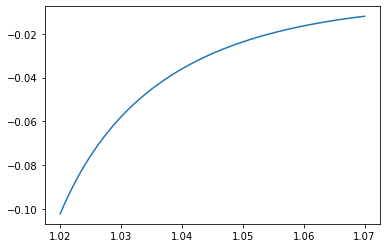

In [4]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(1.02,1.07,0.00001)
y=np.zeros_like(x)
for (c,i)in enumerate(x):
    a=implyvo_lambda_SABR(i)
    y[c]=a.implied_sigmabs()

plt.plot(x,y)
